In [1]:
using Plots
using Random

In [2]:
dT = 0.1 #Timestep

xMin = -10000
xMax = 10000
yMin = -10000
yMax = 10000
zMin = -10000
zMax = 10000

#Def Structs and Functions
mutable struct Debris
    x::Float32 #m
    y::Float32 #m
    z::Float32 #m
    dX::Float32 #m/s
    dY::Float32 #m/s
    dZ::Float32 #m/s
    m::Float32 #kg
    r::Float32 #m
end

#Random Constructor
Debris() = Debris(
    (rand(Float64)*2*xMax - xMin), 
    (rand(Float64)*2*yMax - yMin), 
    (rand(Float64)*2*zMax - zMin), 
    (rand(Float64)*500 - 250), 
    (rand(Float64)*500 - 250), 
    (rand(Float64)*500 - 250), 
    (rand(Float64)*100), 
    (rand(Float64)*5), 
)

#Weighted Constructor


initNum = 100

function step!(deb::Vector{Debris})
    i = 1
    while(i <= size(deb)[1])
        #Add movement based on velocity and time step
        deb[i].x += dT*deb[i].dX
        deb[i].y += dT*deb[i].dY
        
        #If reached  bounding box, reverse velocity in that direction.
        if deb[i].x < xMin || deb[i].x > xMax
            deb[i].dX = -deb[i].dX
        end
        if deb[i].y < yMin || deb[i].y > yMax
            deb[i].dY = -deb[i].dY
        end
        if deb[i].z < zMin || deb[i].z > zMax
            deb[i].dZ = -deb[i].dZ
        end
        
        #Subtract mass - simulate atmospheric drag for removal
        deb[i].m *= 0.999
        if deb[i].m < 2
            deleteat!(deb, i)
            i -= 1
        end
        i += 1
    end
end

function generateNewDebris(d1::Debris, d2::Debris)
    ttlMass = floor((d1.m + d2.m)/9)
    
    avgX = d1.x + d2.x
    avgY = d1.y + d2.y
    avgZ = d1.z + d2.z
    
    newDeb = [Debris(
            (avgX + rand(Float64)*6-3), 
            (avgY + rand(Float64)*6-3), 
            (avgZ + rand(Float64)*6-3),
            (rand(Float64)*500 - 250), 
            (rand(Float64)*500 - 250), 
            (rand(Float64)*500 - 250), 
            (rand(Float64)*100), 
            (ttlMass)) 
            for _ in 1:ttlMass]
    println("Collision " + size(newDeb)[1])
    return newDeb
end

function findCollision!(deb::Vector{Debris})
   #O(n) time?
    count = 0
    i = 1
    while i < size(deb)[1]
        j = i+1
        while j <= size(deb)[1]
            if (abs(deb[i].x-deb[j].x) < deb[i].r+deb[j].r && abs(deb[i].y-deb[j].y) < deb[i].y+deb[j].y && abs(deb[i].z-deb[j].z) < deb[i].z+deb[j].z)
                
                #Check to see if actually collided
                dist = sqrt((deb[i].x - deb[j].x)^2 + (deb[i].y - deb[j].y)^2 + (deb[i].z - deb[j].z)^2)
                
                if (dist < deb[i].r + deb[j].r)
                    #COLLISION
                    c1 = deb[i]
                    c2 = deb[j]
                    
                    deleteat!(deb, i)
                    deleteat!(deb, j-1) #because i was just removed
                    
                    append!(deb, generateNewDebris(c1, c2))
                    
                    i -= 1
                    break
                end
            end
            j += 1
        end
        i += 1
    end
end

function genSeries(deb::Vector{Debris})
    xArr = []
    yArr = []
    zArr = []
    print(deb)
    for i in 1:size(deb)[1]
        push!(xArr, deb[i].x)
        push!(yArr, deb[i].y)
        push!(zArr, deb[i].z)
    end
    return (xArr, yArr, zArr)
end


genSeries (generic function with 1 method)

In [3]:
#Initialize Array of Debris
debArr = [ Debris() for _ in 1:initNum ]

100-element Vector{Debris}:
 Debris(12794.578f0, 17905.127f0, 13823.298f0, -83.28632f0, 55.458935f0, -219.16473f0, 76.74676f0, 1.763784f0)
 Debris(25977.07f0, 22258.523f0, 16043.833f0, -240.27962f0, -234.01703f0, -24.41096f0, 9.39697f0, 1.4722129f0)
 Debris(10158.967f0, 19725.082f0, 21713.56f0, -32.808815f0, -126.04712f0, 126.68333f0, 45.888134f0, 0.34091866f0)
 Debris(15330.078f0, 13643.107f0, 12307.777f0, 131.71712f0, 241.14598f0, -169.3065f0, 88.23832f0, 1.4188744f0)
 Debris(21398.117f0, 10382.266f0, 19059.48f0, 49.79159f0, 93.24304f0, -144.18443f0, 15.807907f0, 0.9769151f0)
 Debris(22030.328f0, 15042.746f0, 13955.211f0, 136.78734f0, -177.75874f0, -180.52515f0, 9.064838f0, 2.9794693f0)
 Debris(25680.477f0, 23169.285f0, 22519.908f0, -136.22798f0, -179.59608f0, -17.178669f0, 75.085724f0, 4.286334f0)
 Debris(13569.785f0, 28143.17f0, 10445.75f0, 110.77531f0, -111.09152f0, 137.79424f0, 40.276733f0, 2.0672214f0)
 Debris(15568.652f0, 14809.501f0, 17937.156f0, 180.071f0, -238.64894f0, -158.

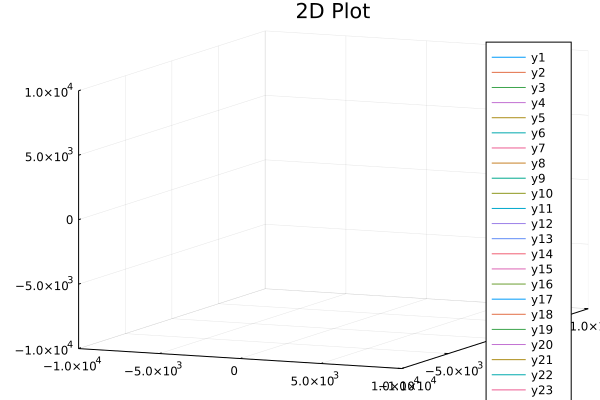

In [5]:
#Define Plot
plt = plot3d(
    100,
    xlim = (xMin, xMax),
    ylim = (yMin, yMax),
    zlim = (zMin, zMax),
    title = "2D Plot",
    marker=1,
)

In [ ]:
@gif for _ ∈ 1:1000
    step!(debArr)
    findCollision!(debArr)
    xArr, yArr, zArr = genSeries(debArr)
    plt(xArr, yArr, zArr)
end every 10

In [ ]:
objs = []

for _ in 1:50000
    print(size(debArr)[1])
    step!(debArr)
    findCollision!(debArr)
    push!(objs, size(debArr)[1])
end


In [ ]:
x = 1:50000
plot(x, objs)